In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('disulfides.csv')
print len(df)

18076


### Analyse the distribution of side chain dihedral angles

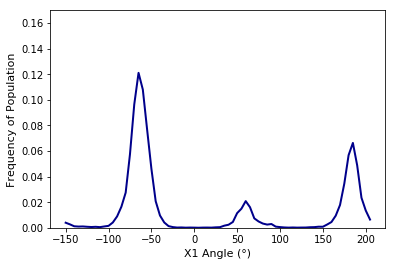

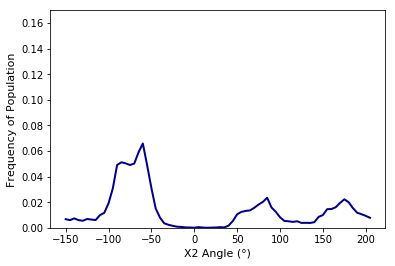

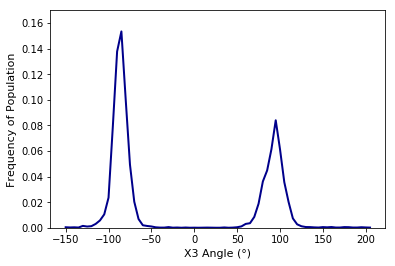

In [6]:
import collections
import operator
# Round to the nearest 5
def custom_round(x, base=5):
    x = int(base * round(float(x)/base))
    
    # To took at the distribution of angles at 180 degrees: We classify -150 to -180 as 180 - 210
    if x < -150:
        x = x + 360
    return x
x1  = df['x1'].apply(lambda x: custom_round(x, base=5)).tolist()
x1b = df['x1b'].apply(lambda x: custom_round(x, base=5)).tolist()
x2  = df['x2'].apply(lambda x: custom_round(x, base=5)).tolist()
x2b = df['x2b'].apply(lambda x: custom_round(x, base=5)).tolist()
x3  = df['x3'].apply(lambda x: custom_round(x, base=5)).tolist()

x1 = x1+x1b
x2 = x2+x2b

x1_frequency = collections.Counter(x1)
x2_frequency = collections.Counter(x2)
x3_frequency = collections.Counter(x3)

ordered_x1_frequency = sorted(x1_frequency.items(), key=operator.itemgetter(0))
ordered_x2_frequency = sorted(x2_frequency.items(), key=operator.itemgetter(0))
ordered_x3_frequency = sorted(x3_frequency.items(), key=operator.itemgetter(0))

x1_axis = [(_[0]) for _ in ordered_x1_frequency]
x2_axis = [(_[0]) for _ in ordered_x2_frequency]
x3_axis = [(_[0]) for _ in ordered_x3_frequency]

x1_frequency = [(float(_[1]) / float(len(x1))) for _ in ordered_x1_frequency]
x2_frequency = [(float(_[1]) / float(len(x2))) for _ in ordered_x2_frequency]
x3_frequency = [(float(_[1]) / float(len(x3))) for _ in ordered_x3_frequency]

# Generate Line Graphs
import matplotlib.pyplot as plt
import numpy as np
# Create X1 graph
plt.plot(x1_axis,x1_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X1 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes =plt.gca()
axes.set_ylim([0,0.17])
plt.show()

# Create X2 graph
plt.plot(x2_axis,x2_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X2 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
axes.set_ylim([0,0.17])
plt.show()

# Creat X3 graph
plt.plot(x3_axis,x3_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X3 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes =plt.gca()
axes.set_ylim([0,0.17])
plt.show()

# # Analysis of Configurations

In [7]:
import itertools

import os,sys
import shutil
import numpy
import math 

### GENERATE A LIST OF ALL 90 THEORETICAL CONFIGURATIONS
a= 60
b= -60
c= 180
d= -90
e= 90

import string
exclude = set(string.punctuation)
dihedralsx=numpy.empty(shape=(5,1))

possible=[[a,b,c],[a,b,c],[d,e],[a,b,c],[a,b,c]]
configurations=list(itertools.product(*possible))
unique = []
for value in configurations:
      if value[::-1] in unique:
            continue
      unique.append(value)
configurations = unique

#print configuration_dict
#
### Round all of the dihedral X angles to suitable conformation
dihedrals = df[['x1','x2','x3','x2b','x1b']]

def x1_rounded(x1):
    x1=float(x1)
    if (x1 <=  90) & (x1 >= 30):
        x1= 60
    if (x1 >= -90)  & (x1 <= -30):
        x1 = -60   
    if (x1 <=  180) & (x1 >= 150):
        x1= 180
    if (x1 >= -180) & (x1 <= -150):
        x1=180
    return(x1)

def x2_rounded(x2):
    x2=float(x2)
    if (x2 <=  120) & (x2 >= 30):
        x2= 60
    if (x2 >= -120) & (x2 <= -30):
        x2 = -60   
    if (x2 <=  180) & (x2 >= 150):
        x2= 180
    if (x2 >= -180) & (x2 <= -150):
        x2=180
    return(x2)

def x3_rounded(x3):
    x3=float(x3)
    if (x3  <=  120)  & (x3 >= 60):
        x3   = 90
    if (x3  >=  -120) & (x3 <= -60):
        x3   = -90
    return(x3)
        
df['x1' ]  = df['x1'].apply(x1_rounded)
df['x1b']  = df['x1b'].apply(x1_rounded)
df['x2' ]  = df['x2'].apply(x2_rounded)
df['x2b']  = df['x2b'].apply(x2_rounded)
df['x3' ]  = df['x3'].apply(x3_rounded)

# Count the number of each configuration
# Have to consider assymetical configuraitons (x1,x2,x3,x2',x1' ==  x1',x2',x3,x2,1)

def configuration_count(config):
    config = list(config)
    forward_config = len(df.loc[(df['x1'] == float(config[0])) & (df['x2'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['x2b'] == float(config[3]))& (df['x1b'] == float(config[4])) ]) #& df['x2'] == float(config[1])])
    if config != config[::-1]:
        reverse_config =  len(df.loc[(df['x1b'] == float(config[0])) & (df['x2b'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['x2'] == float(config[3]))& (df['x1'] == float(config[4])) ])
        forward_config = reverse_config + forward_config
    
    return(forward_config)

# Store in dictionary
plus_x3_configuration_dict = {}
minus_x3_configuration_dict = {}
for config in configurations:
    if list(config)[2] == 90:
        plus_x3_configuration_dict[config] = configuration_count(config)
    if list(config)[2] == -90:
        minus_x3_configuration_dict[config] = configuration_count(config)
        
plus_x3_ordered_configuration = sorted(plus_x3_configuration_dict.items(), key=operator.itemgetter(0))
minus_x3_ordered_configuration = sorted(minus_x3_configuration_dict.items(), key=operator.itemgetter(0))
print plus_x3_ordered_configuration


[((-60, -60, 90, -60, -60), 824), ((-60, -60, 90, -60, 180), 3), ((-60, -60, 90, 60, 180), 618), ((-60, -60, 90, 180, -60), 352), ((-60, -60, 90, 180, 180), 10), ((-60, 60, 90, -60, -60), 623), ((-60, 60, 90, -60, 180), 0), ((-60, 60, 90, 60, -60), 20), ((-60, 60, 90, 60, 180), 313), ((-60, 60, 90, 180, -60), 15), ((-60, 60, 90, 180, 180), 31), ((-60, 180, 90, -60, 180), 1), ((-60, 180, 90, 60, 180), 661), ((-60, 180, 90, 180, -60), 39), ((-60, 180, 90, 180, 180), 18), ((60, -60, 90, -60, -60), 1), ((60, -60, 90, -60, 60), 0), ((60, -60, 90, -60, 180), 0), ((60, -60, 90, 60, -60), 16), ((60, -60, 90, 60, 180), 6), ((60, -60, 90, 180, -60), 2), ((60, -60, 90, 180, 60), 0), ((60, -60, 90, 180, 180), 4), ((60, 60, 90, -60, -60), 801), ((60, 60, 90, -60, 60), 1), ((60, 60, 90, -60, 180), 13), ((60, 60, 90, 60, -60), 17), ((60, 60, 90, 60, 60), 70), ((60, 60, 90, 60, 180), 223), ((60, 60, 90, 180, -60), 9), ((60, 60, 90, 180, 60), 3), ((60, 60, 90, 180, 180), 1), ((60, 180, 90, -60, -60), 6

### Generate Configuration Frequency Graphs

<IPython.core.display.Javascript object>


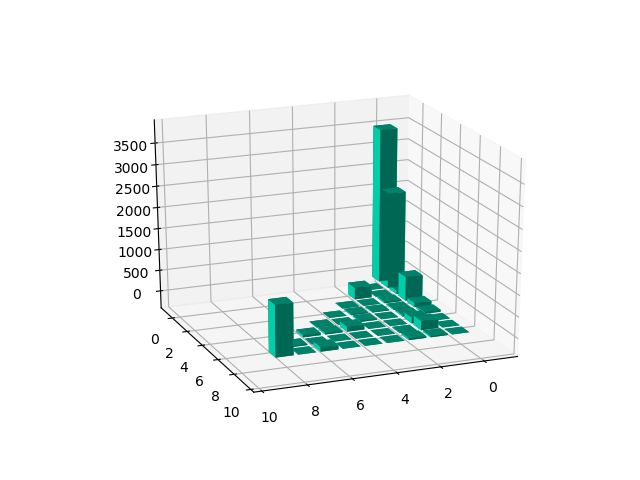

45


In [13]:
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')


xpos = [0 for _ in range(0,9)] + [1 for _ in range(1,9)]+ [2 for _ in range(2,9)]+ [3 for _ in range(3,9)]+ [4 for _ in range(4,9)]+ [5 for _ in range(5,9)]+ [6 for _ in range(6,9)]+ [7 for _ in range(7,9)]+ [8 for _ in range(8,9)]
print len(xpos)
ypos = [_ for _ in range(0,9)] + [_ for _ in range(1,9)]+ [_ for _ in range(2,9)]+ [_ for _ in range(3,9)]+ [_ for _ in range(4,9)]+ [_ for _ in range(5,9)]+ [_ for _ in range(6,9)]+ [_ for _ in range(7,9)]+ [_ for _ in range(8,9)]
zpos = [0 for _ in range(len(minus_x3_ordered_configuration))]
#
#
## print zpos
num_elements = len(xpos)
dx = np.ones(45)
dy = np.ones(45)
#
#print dx
dx = [0.8 for _ in range(len(minus_x3_ordered_configuration))]
dy = [0.8 for _ in range(len(minus_x3_ordered_configuration))]
dz = [_[1] for _ in minus_x3_ordered_configuration]

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
#plt.show()

<IPython.core.display.Javascript object>


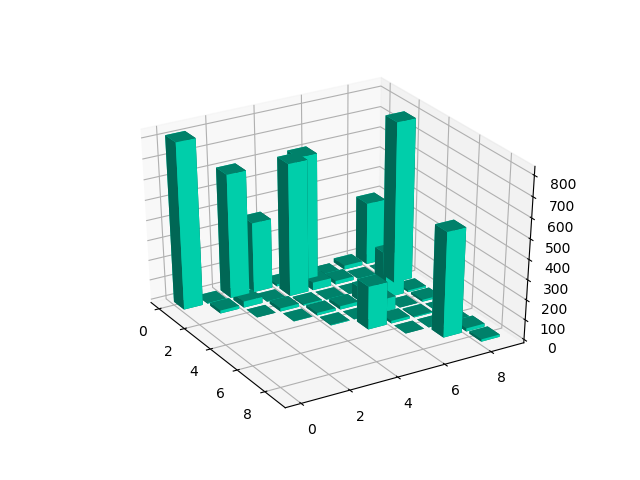

45


In [12]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')


xpos = [0 for _ in range(0,9)] + [1 for _ in range(1,9)]+ [2 for _ in range(2,9)]+ [3 for _ in range(3,9)]+ [4 for _ in range(4,9)]+ [5 for _ in range(5,9)]+ [6 for _ in range(6,9)]+ [7 for _ in range(7,9)]+ [8 for _ in range(8,9)]
print len(xpos)
ypos = [_ for _ in range(0,9)] + [_ for _ in range(1,9)]+ [_ for _ in range(2,9)]+ [_ for _ in range(3,9)]+ [_ for _ in range(4,9)]+ [_ for _ in range(5,9)]+ [_ for _ in range(6,9)]+ [_ for _ in range(7,9)]+ [_ for _ in range(8,9)]
zpos = [0 for _ in range(len(plus_x3_ordered_configuration))]
#
#
## print zpos
num_elements = len(xpos)
dx = np.ones(45)
dy = np.ones(45)
#
#print dx
dx = [0.8 for _ in range(len(plus_x3_ordered_configuration))]
dy = [0.8 for _ in range(len(plus_x3_ordered_configuration))]
dz = [_[1] for _ in plus_x3_ordered_configuration]

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
#plt.show()